In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Linear Regression/

In [3]:
from sklearn.linear_model import LinearRegression

In [6]:
lm=LinearRegression()
lm


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

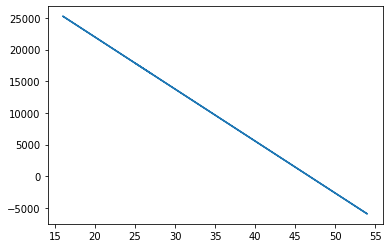

In [66]:
plt.plot(X, Yhat)
plt.show()

In [20]:
# value of intercept
lm.intercept_


38423.305858157386

In [23]:
# value of slop
lm.coef_

array([-821.73337832])

# Multiple Linear Regression

In [24]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
lm.intercept_

-15806.624626329198

In [25]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [27]:
yhat=lm.predict(Z)

In [28]:
yhat

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097, 10722.32509097, 17804.80307397,
       18063.72662867, 19320.78745066, 26968.56492801, 27674.72007721,
       28191.0677239 ,   650.62317688,  5648.50489642,  5813.27443123,
        5478.81383232,  5370.64136587,  8739.61952024,  5799.04215638,
        5902.61157827,  5902.61157827,  9036.2046829 , 11863.43973759,
       18767.70667001,  4808.3090102 ,  5693.32889063,  4006.47212651,
        6118.73075572,  6194.05397163,  6448.26982534,  6514.17763926,
        9478.65495235,  9728.16310506,  9798.77861998, 10118.90228761,
       11178.86719942, 10423.81935057,  9463.46710755, 12626.61544369,
       34470.03895495, 34470.03895495, 43996.52260522,  5265.67702191,
        5565.15645357,  5588.69495854,  5777.00299832,  5800.5415033 ,
        7337.21461795,  7337.21461795,  7360.75312292, 10536.2966792 ,
      

**Residual Plot**

In [29]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0, 48175.868304970805)

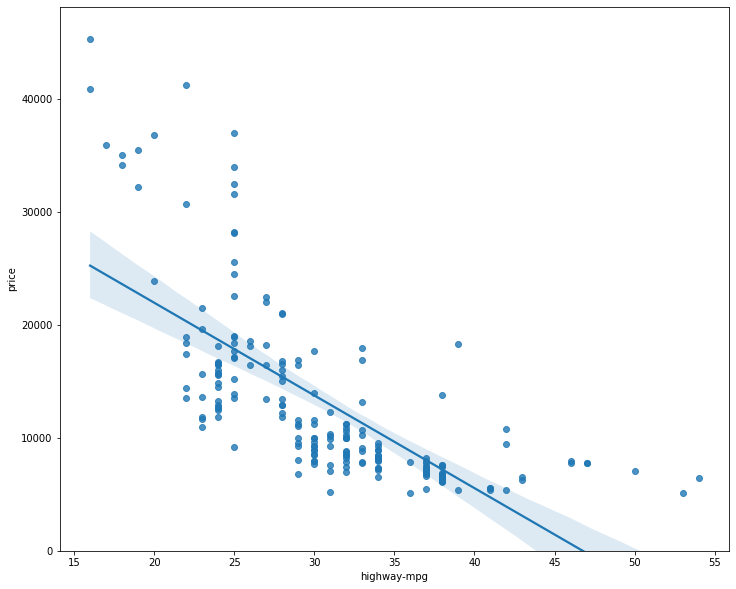

In [30]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

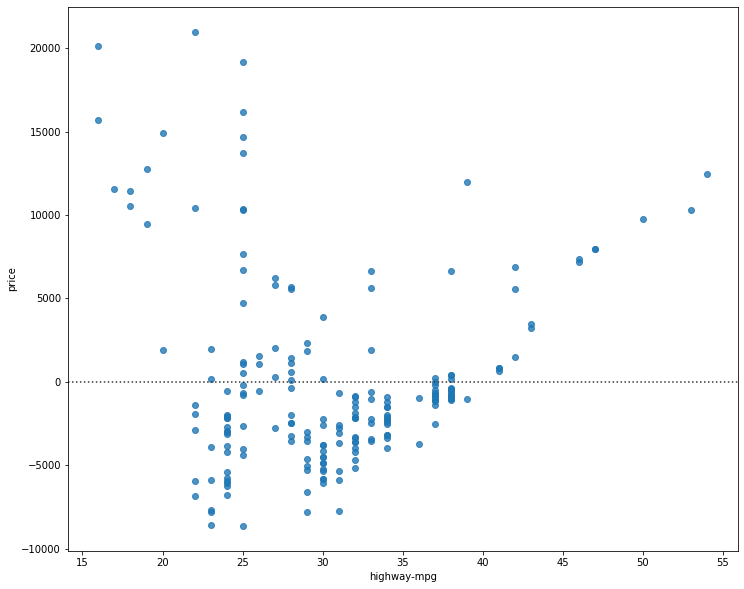

In [32]:
# A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

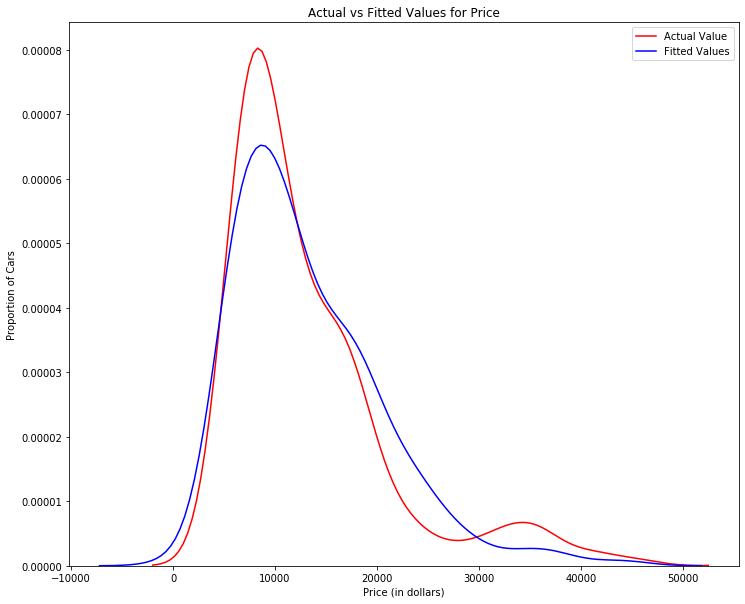

In [33]:
Yhat=lm.predict(Z)


plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# Polynomial Regression/


In [35]:
#Function to plot the data

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [62]:
x = df['highway-mpg']

y = df['price']
       
       




# Here we use a polynomial of the 3rd order (cubic) 

In [63]:
f = np.polyfit(x, y, 3)

p = np.poly1d(f)

print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


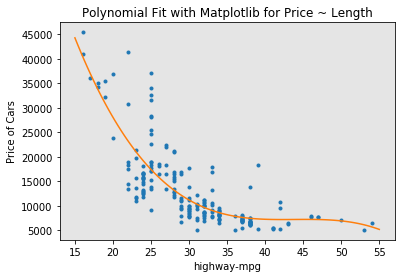

In [64]:
PlotPolly(p, x, y, 'highway-mpg')


The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:
                       
$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


We can perform a polynomial transform on multiple features. First, we import the module:

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [43]:
Z_pr=pr.fit_transform(Z)

In [44]:
Z.shape

(201, 4)

In [45]:
Z_pr.shape

(201, 15)

# Pipeline

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [47]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [48]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [49]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [50]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

#  Measures for In-Sample Evaluation

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- R^2 / R-squared
- Mean Squared Error (MSE)

In [51]:
from sklearn.metrics import mean_squared_error

**Model 1: Simple Linear Regression**

In [52]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


In [53]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [54]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)


The mean square error of price and predicted value is:  31635042.944639895


**Model 2: Multiple Linear Regression**

In [55]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [56]:
Y_predict_multifit = lm.predict(Z)

In [57]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


**Model 3: Polynomial Fit**

In [58]:
from sklearn.metrics import r2_score

In [59]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)


The R-square value is:  0.674194666390652


In [60]:
mean_squared_error(df['price'], p(x))

20474146.426361218

<h3>Decision Making: Determining a Good Model Fit</h3>

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>
